**Predict Attrition Values for the given data set of employees**

In [1]:
#This fuction is for the plotly package to work

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

Importing Python libraries

In [2]:
# importing libraries for data handling and analysis
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from scipy.stats import norm, skew
'''import warnings
warnings.filterwarnings('ignore')'''

"import warnings\nwarnings.filterwarnings('ignore')"

In [3]:
#!pip install chart_studio

In [4]:
# importing libraries for data visualisations
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
color = sns.color_palette()
pd.options.display.max_columns = None
# Standard plotly imports
import plotly.offline as py
import pandas as pd
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
#py.initnotebookmode(connected=True) # this code, allow us to work with offline plotly version
# Using plotly + cufflinks in offline mode
'''import cufflinks as cf
cf.set_config_file(offline=True)
import cufflinks
cufflinks.go_offline(connected=True)'''

'import cufflinks as cf\ncf.set_config_file(offline=True)\nimport cufflinks\ncufflinks.go_offline(connected=True)'

In [5]:
# sklearn modules for preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

Upload the dataset in csv format

In [6]:
'''from google.colab import files
uploaded = files.upload()'''

'from google.colab import files\nuploaded = files.upload()'

In [7]:
import io
df2 = pd.read_csv('org.csv')

In [8]:
print("Shape of dataframe is: {}".format(df2.shape))

Shape of dataframe is: (1470, 35)


In [9]:
df_HR = df2.copy()

**Data Description and Exploratory Visualisations**

In this section, we will provide data visualizations that summarizes or extracts relevant characteristics of features in our dataset. Let's look at each column in detail, get a better understanding of the dataset, and group them together.

In [10]:
# Dataset columns
df_HR.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [11]:
# Dataset header
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [12]:
df_HR.drop(['EmployeeCount','StandardHours'],axis=1,inplace = True)

In [13]:
lt = [['Yes','No'][x] for x in df_HR.Attrition]
df_HR['Target'] = lt

In [14]:
df_HR['Target'].value_counts()

Yes    1233
No      237
Name: Target, dtype: int64

In [15]:
df2 = df_HR.copy()

The dataset contains several numerical and categorical columns providing various information on employee's personal and employment details.

In [16]:
#break down the columns by their type (i.e. int64, float64, object)
df_HR.columns.to_series().groupby(df_HR.dtypes).groups

{dtype('int64'): Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
        'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate',
        'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome',
        'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike',
        'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
        'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
        'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
        'YearsWithCurrManager'],
       dtype='object'),
 dtype('O'): Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
        'MaritalStatus', 'Over18', 'OverTime', 'Target'],
       dtype='object')}

In [17]:
# Columns datatypes and missing values
df_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 34 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate            

Inference: The data provided has no missing values.

In [18]:
df_HR.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


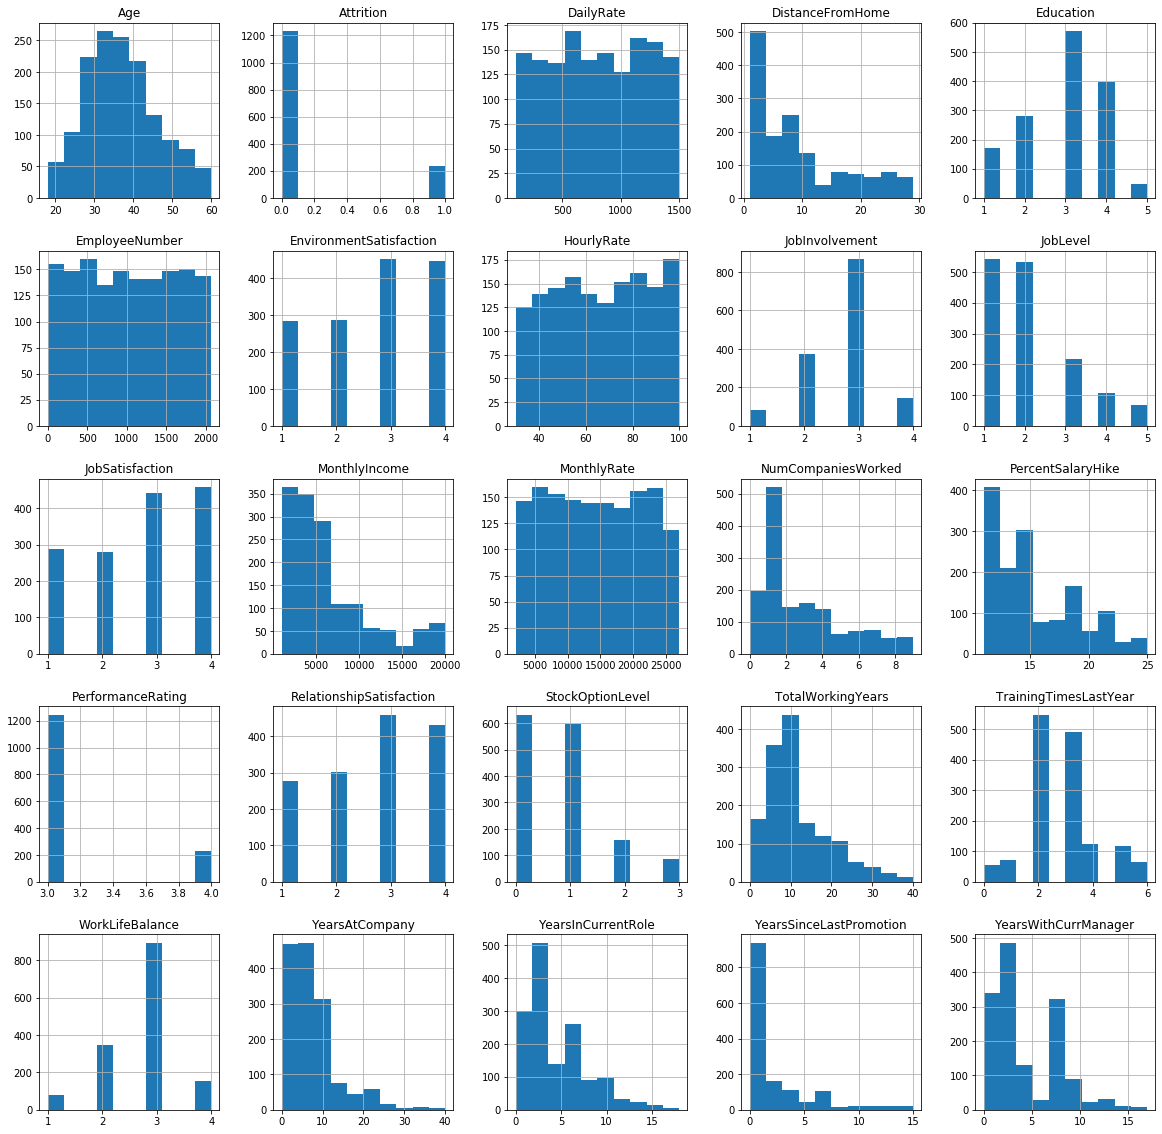

In [19]:
df_HR.hist(figsize=(20,20))
plt.show()

Observations made are:

-Many histograms are tail-heavy; indeed several distributions are right-skewed (e.g. MonthlyIncome DistanceFromHome, YearsAtCompany). 

-Age distribution is a slightly right-skewed normal distribution with the bulk of the staff between 25 and 45 years old.

-EmployeeCount and StandardHours are constant values for all employees. They're likely to be redundant features.

-Employee Number is likely to be a unique identifier for employees.

In [20]:
(mu, sigma) = norm.fit(df_HR.loc[df_HR['Attrition'] == 1, 'Age'])
print('Ex-employees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(mu, sigma))
(mu, sigma) = norm.fit(df_HR.loc[df_HR['Attrition'] == 0, 'Age'])
print('Current employees: average age = {:.1f} years old and standard deviation = {:.1f}'.format(
    mu, sigma))

Ex-employees: average age = 33.6 years old and standard deviation = 9.7
Current employees: average age = 37.6 years old and standard deviation = 8.9


In [21]:
# Education Field of employees
df_HR['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

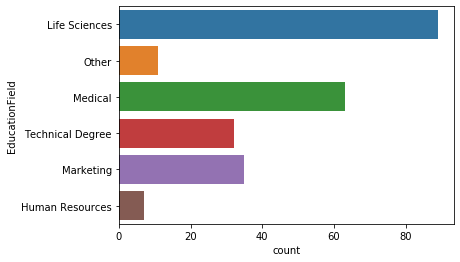

In [22]:
##Most people who tend to leave the company belong to Life Sciences,Medicaland 
import seaborn as sns
import pandas as pd
df_HR = pd.read_csv('org.csv')
yes = df_HR[df_HR.Attrition == 1]
sns.countplot(y = yes.EducationField,orient = 'v')

In [23]:
# Gender of employees
df_HR['Gender'].value_counts()

Male      882
Female    588
Name: Gender, dtype: int64

In [24]:
print("Normalised gender distribution of ex-employees in the dataset: Male = {:.1f}%; Female {:.1f}%.".format((df_HR[(df_HR['Attrition'] == 1) & (
    df_HR['Gender'] == 'Male')].shape[0] / df_HR[df_HR['Gender'] == 'Male'].shape[0])*100, (df_HR[(df_HR['Attrition'] == 1) & (df_HR['Gender'] == 'Female')].shape[0] / df_HR[df_HR['Gender'] == 'Female'].shape[0])*100))

Normalised gender distribution of ex-employees in the dataset: Male = 17.0%; Female 14.8%.


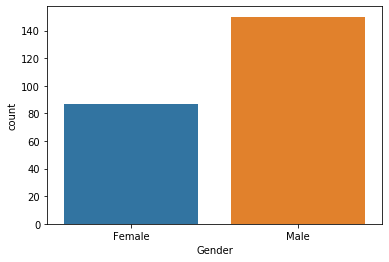

In [25]:
##Number of males to leave the company is more than females
sns.countplot(yes.Gender)

In [26]:
# Marital Status of employees
df_HR['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

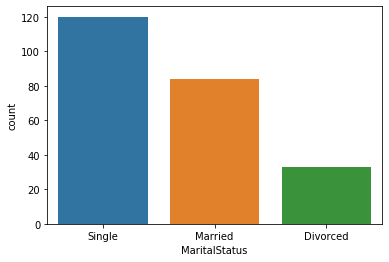

In [27]:
##Most people who leave the company are single by martial status
sns.countplot(yes.MaritalStatus)

In [28]:
# Distance from Home
print("Distance from home for employees to get to work is from {} to {} miles.".format(df_HR['DistanceFromHome'].min(),
                                                                                       df_HR['DistanceFromHome'].max()))

Distance from home for employees to get to work is from 1 to 29 miles.


In [29]:
print('Average distance from home for currently active employees: {:.2f} miles and ex-employees: {:.2f} miles'.format(
    df_HR[df_HR['Attrition'] == 0]['DistanceFromHome'].mean(), df_HR[df_HR['Attrition'] == 1]['DistanceFromHome'].mean()))

Average distance from home for currently active employees: 8.92 miles and ex-employees: 10.63 miles


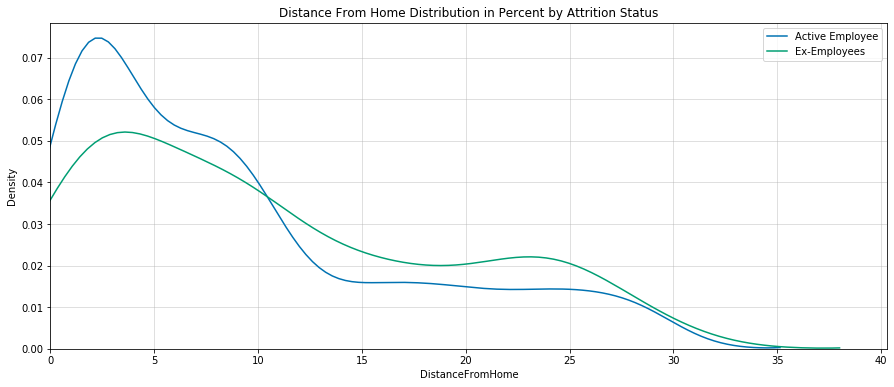

In [30]:
##Most people who tend to leave the company have more distance from home (>=10) compared to those who tend to stay.
configure_plotly_browser_state()

plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 0, 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 1, 'DistanceFromHome'], label = 'Ex-Employees')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance From Home Distribution in Percent by Attrition Status');

In [31]:
# The organisation consists of several departments
df_HR['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [32]:
# Employees have different business travel commitmnent depending on their roles and level in the organisation
df_HR['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

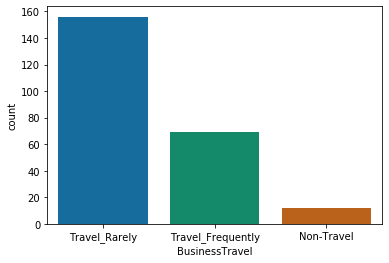

In [33]:
##Most people who tend to leave the company used to travel rarely
sns.countplot(yes.BusinessTravel)

In [34]:
# Employees in the database have several roles on-file
df_HR['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

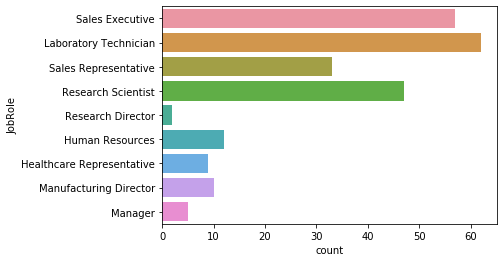

In [35]:
##Job Roles including Sales representative,Sales Executive,Research Scientist,HR and lab technician tend to leave the company.
sns.countplot(y = yes.JobRole)

In [36]:
df_HR['JobLevel'].value_counts()


1    543
2    534
3    218
4    106
5     69
Name: JobLevel, dtype: int64

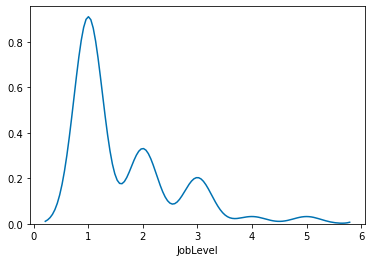

In [37]:
##Most people who tend to leave the organization belonged to Job level 1, i.e at a very early level.
sns.distplot(yes.JobLevel,hist = False)

In [38]:
df_HR['JobInvolvement'].value_counts()

3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64

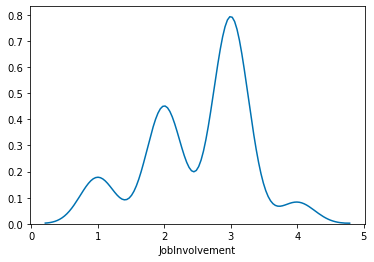

In [39]:
##People with more involvement in their job tend to leave the organization at a higher rate
sns.distplot(yes.JobInvolvement,hist = False)

In [40]:
print("Number of training times last year varies from {} to {} years.".format(
    df_HR['TrainingTimesLastYear'].min(), df_HR['TrainingTimesLastYear'].max()))

Number of training times last year varies from 0 to 6 years.


In [41]:
df_HR['NumCompaniesWorked'].value_counts()

1    521
0    197
3    159
2    146
4    139
7     74
6     70
5     63
9     52
8     49
Name: NumCompaniesWorked, dtype: int64

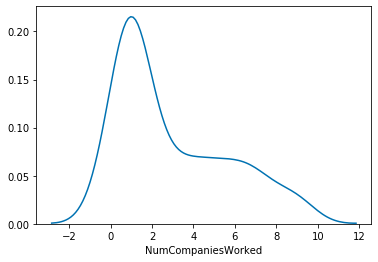

In [42]:
##People who have worked in different organization, i.e have changed their jobs frequently are more likely to leave the organization.
sns.distplot(yes.NumCompaniesWorked,hist = False)

In [43]:
print("Number of Years at the company varies from {} to {} years.".format(
    df_HR['YearsAtCompany'].min(), df_HR['YearsAtCompany'].max()))

Number of Years at the company varies from 0 to 40 years.


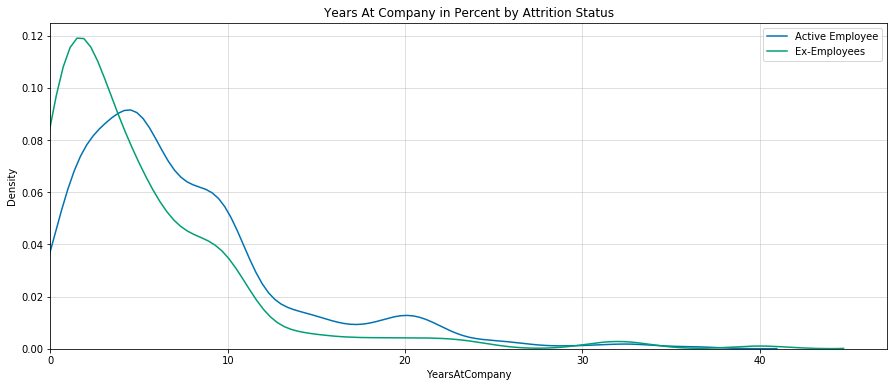

In [44]:
##People who have spent lesser time in the company are likely to discontinue their work.
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 0, 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 1, 'YearsAtCompany'], label = 'Ex-Employees')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company in Percent by Attrition Status');

In [45]:
print("Number of Years in the current role varies from {} to {} years.".format(
    df_HR['YearsInCurrentRole'].min(), df_HR['YearsInCurrentRole'].max()))

Number of Years in the current role varies from 0 to 18 years.


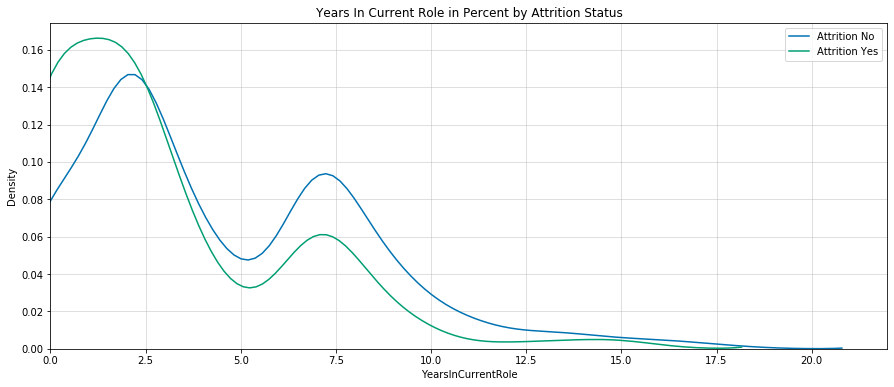

In [46]:
##Most people who have spent lesser time in their role,are likely to leave the organization. with increase in their years in role they tend to stay in the organization.
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 0, 'YearsInCurrentRole'], label = 'Attrition No ')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 1, 'YearsInCurrentRole'], label = 'Attrition Yes')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years In Current Role in Percent by Attrition Status');

In [47]:
print("Number of Years since last promotion varies from {} to {} years.".format(
    df_HR['YearsSinceLastPromotion'].min(), df_HR['YearsSinceLastPromotion'].max()))

Number of Years since last promotion varies from 0 to 15 years.


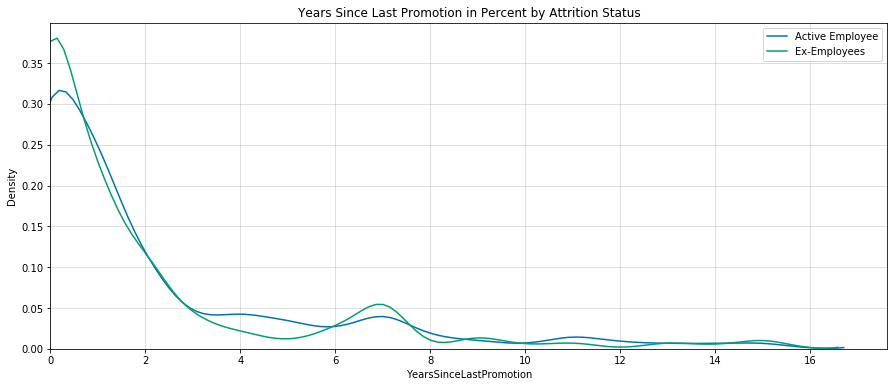

In [48]:
##Mostly the employees with more number of difference in their promotion period are less likely to leave the company.
##And with less number of difference i.e 1 or less than it are more likely to leave the company
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 0, 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 1, 'YearsSinceLastPromotion'], label = 'Ex-Employees')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion in Percent by Attrition Status');


In [49]:
print("Total working years varies from {} to {} years.".format(
    df_HR['TotalWorkingYears'].min(), df_HR['TotalWorkingYears'].max()))

Total working years varies from 0 to 40 years.


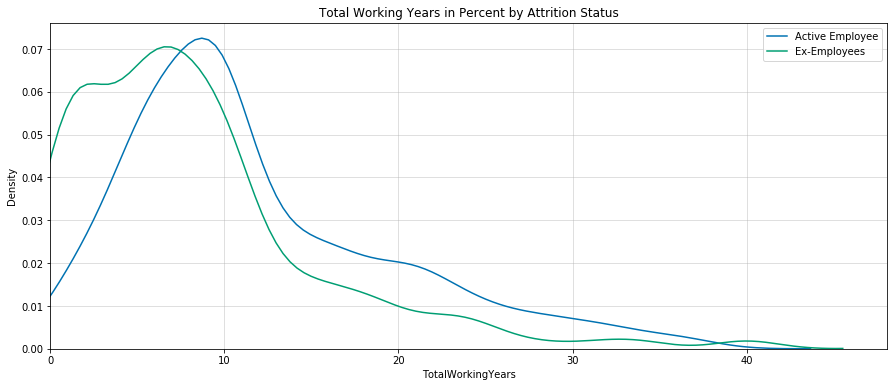

In [50]:
##Number of people spending lesser time in organization are more likely to leave it.
##Number of people with comparatively more experience in the same company (>=38)years are more likely to leave the company
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 0, 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 1, 'TotalWorkingYears'], label = 'Ex-Employees')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years in Percent by Attrition Status');


In [51]:
print("Number of Years with current manager varies from {} to {} years.".format(
    df_HR['YearsWithCurrManager'].min(), df_HR['YearsWithCurrManager'].max()))

Number of Years with current manager varies from 0 to 17 years.


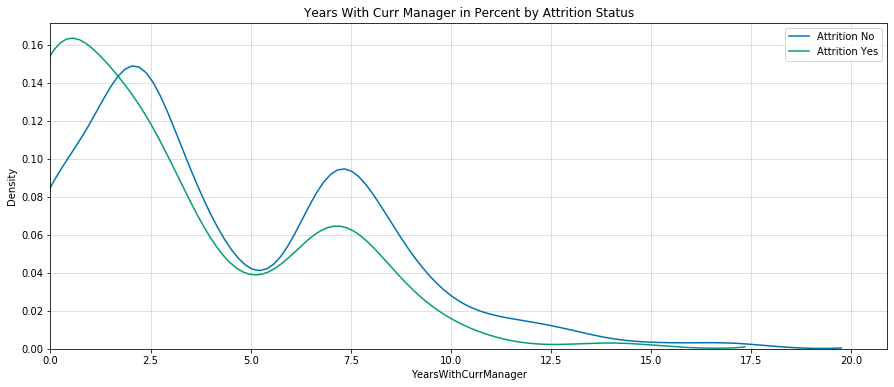

In [52]:
##More number of people who are leaving the company are wokring with the same manager for lesser time.
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 0, 'YearsWithCurrManager'], label = 'Attrition No')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 1, 'YearsWithCurrManager'], label = 'Attrition Yes')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager in Percent by Attrition Status');


In [53]:
df_HR['OverTime'].value_counts()


No     1054
Yes     416
Name: OverTime, dtype: int64

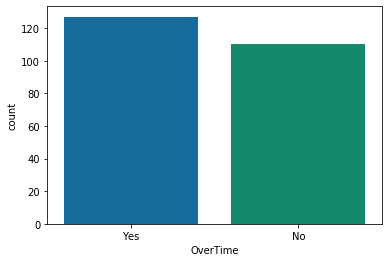

In [54]:
##Important################
##Most people who tend to leave the company used to work Overtime in their work.
sns.countplot(yes.OverTime)

In [55]:
print("Employee Hourly Rate varies from ${} to ${}.".format(
    df_HR['HourlyRate'].min(), df_HR['HourlyRate'].max()))

Employee Hourly Rate varies from $30 to $100.


In [56]:
print("Employee Daily Rate varies from ${} to ${}.".format(
    df_HR['DailyRate'].min(), df_HR['DailyRate'].max()))

Employee Daily Rate varies from $102 to $1499.


In [57]:
print("Employee Monthly Rate varies from ${} to ${}.".format(
    df_HR['MonthlyRate'].min(), df_HR['MonthlyRate'].max()))

Employee Monthly Rate varies from $2094 to $26999.


In [58]:
print("Employee Monthly Income varies from ${} to ${}.".format(
    df_HR['MonthlyIncome'].min(), df_HR['MonthlyIncome'].max()))

Employee Monthly Income varies from $1009 to $19999.


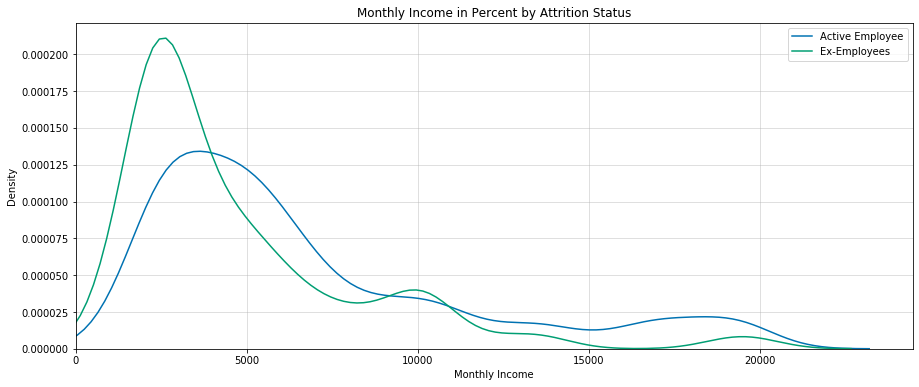

In [59]:
##Most people who tend to leave the company are having lesser income and hence the count is more. 
##Also the people with more income are less likely to leave the company
plt.figure(figsize=(15,6))
plt.style.use('seaborn-colorblind')
plt.grid(True, alpha=0.5)
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 0, 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(df_HR.loc[df_HR['Attrition'] == 1, 'MonthlyIncome'], label = 'Ex-Employees')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income in Percent by Attrition Status');


In [60]:
# Job Satisfaction was captured as: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'
#df_HR['JobSatisfaction'].value_counts()

In [61]:
df_HR['RelationshipSatisfaction'].value_counts()

3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64

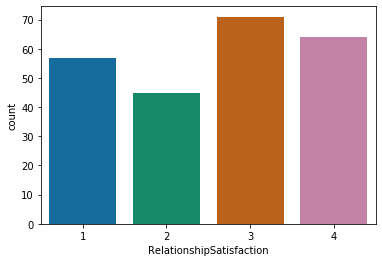

In [62]:
##The leavers were having an average relationship satisfaction with company
sns.countplot(yes.RelationshipSatisfaction)

In [63]:
df_HR['PerformanceRating'].value_counts()

3    1244
4     226
Name: PerformanceRating, dtype: int64

In [64]:
print("Normalised percentage of leavers by Stock Option Level: 3: {:.2f}%, 4: {:.2f}%".format(
    df_HR[(df_HR['Attrition'] == 1) & (df_HR['PerformanceRating'] == 3)
          ].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100,
    df_HR[(df_HR['Attrition'] == 1) & (df_HR['PerformanceRating'] == 4)].shape[0] / df_HR[df_HR['StockOptionLevel'] == 1].shape[0]*100))

Normalised percentage of leavers by Stock Option Level: 3: 33.56%, 4: 6.21%


In [65]:
# Attrition indicates if the employee is currently active ('No') or has left the company ('Yes')
df_HR['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

In [66]:
print("Percentage of Current Employees is {:.1f}% and of Ex-employees is: {:.1f}%".format(
    df_HR[df_HR['Attrition'] == 0].shape[0] / df_HR.shape[0]*100,
    df_HR[df_HR['Attrition'] == 1].shape[0] / df_HR.shape[0]*100))

Percentage of Current Employees is 83.9% and of Ex-employees is: 16.1%


In [67]:
##Very less people tend toleave the company

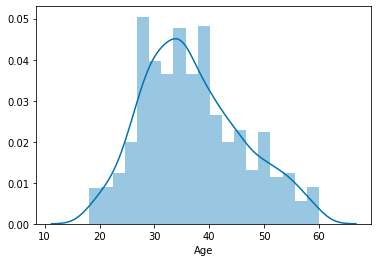

In [68]:
###from this graph we can conclude that most of the people lie in the age ranging from 25-42
sns.distplot(df_HR.Age)

In [69]:
##With this graph we can conclude that with an increase in age and years in the company, the employees are less likely to get weakened
##Also at a initial stage, the people are more likely to get weakened at a lower age group(20-30)
'''sns.relplot(x='Age', y='YearsAtCompany', hue="Attrition",
            data=df_HR)'''

'sns.relplot(x=\'Age\', y=\'YearsAtCompany\', hue="Attrition",\n            data=df_HR)'

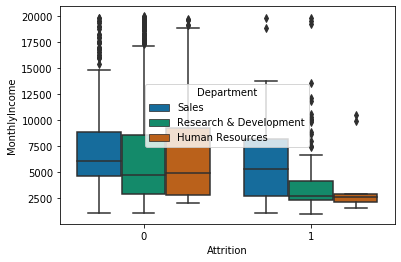

In [70]:
sns.boxplot(y = df_HR.MonthlyIncome,hue = df_HR.Department,x = df_HR.Attrition)

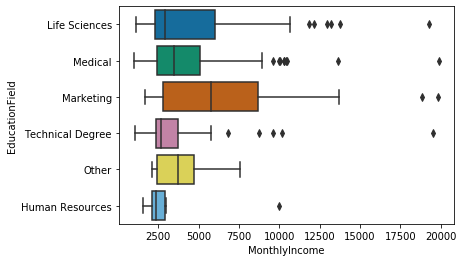

In [71]:
##The plots are arranged considering the number of counts of employees in each field
yes = df_HR[df_HR.Attrition == 1]
sns.boxplot(x = yes.MonthlyIncome,y = yes.EducationField,orient = 'h',order = ['Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'])

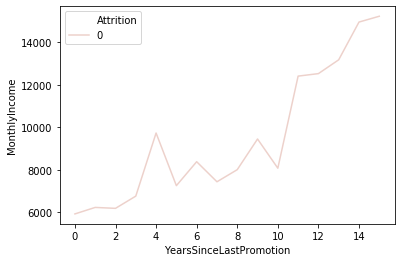

In [72]:
no = df_HR[df_HR['Attrition'] == 0]
sns.lineplot(x = no.YearsSinceLastPromotion,y = no.MonthlyIncome,hue = no.Attrition,ci = None)
##for those who chose to stay in company, there monthly income increases with respect to there promotion period
##for those who choose to leave company, for them the monthly income has no proper relation with promotion period

In [73]:
l =  [['No','Yes'][x] for x in df_HR.Attrition]
l
df_HR['Target'] = l

In [74]:
df_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


Working and Removal of Outliers


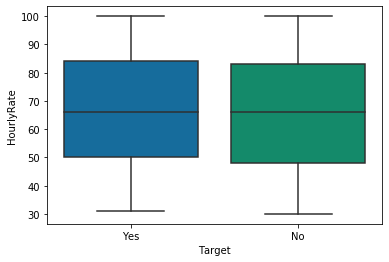

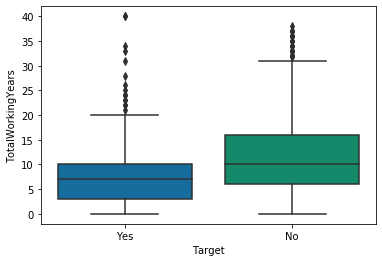

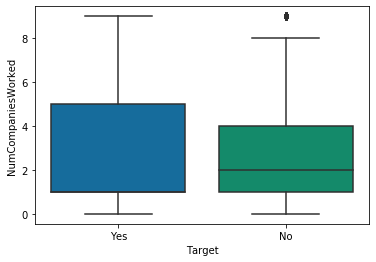

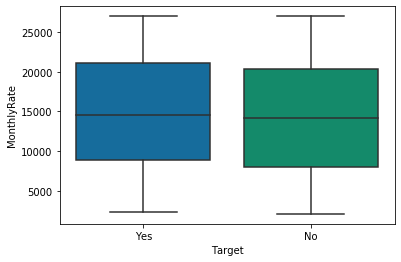

In [75]:
##Focused on graphs with more outliers
for i in ['HourlyRate','TotalWorkingYears','NumCompaniesWorked','MonthlyRate']:
    sns.boxplot(y = df_HR[i],x = df_HR['Target'])
    plt.show()

In [76]:
print(df_HR['TotalWorkingYears'].quantile(0.10))
print(df_HR['TotalWorkingYears'].quantile(0.80))
df1 = df_HR.copy()
df1.shape

3.0
17.0


(1470, 36)

In [77]:
df1["TotalWorkingYears"] = np.where(df_HR["TotalWorkingYears"] <1, 1,df_HR['TotalWorkingYears'])
df1["TotalWorkingYears"] = np.where(df_HR["TotalWorkingYears"] >16,16,df_HR['TotalWorkingYears'])
print(df1['TotalWorkingYears'].skew())

-0.0785438930676131


In [78]:
df1["TotalWorkingYears"].describe()

count    1470.000000
mean        9.629932
std         4.815923
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        16.000000
Name: TotalWorkingYears, dtype: float64

In [79]:
num1 = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [80]:
'''for i in num1:
    sns.boxplot(y = df1[i],x = df1['Target'])
    plt.show()'''

"for i in num1:\n    sns.boxplot(y = df1[i],x = df1['Target'])\n    plt.show()"

In [81]:
df_HR['MonthlyIncome'].describe()
x = df_HR['MonthlyIncome'].quantile(0.10)
y = df_HR['MonthlyIncome'].quantile(0.80)
df1["MonthlyIncome"] = np.where(df_HR["MonthlyIncome"] <x, x,df_HR['MonthlyIncome'])
df1["MonthlyIncome"] = np.where(df_HR["MonthlyIncome"] >y, y,df_HR['MonthlyIncome'])
print(df1['MonthlyIncome'].skew())

0.39549046937959503


In [82]:
df_HR['NumCompaniesWorked'].describe()
x = df_HR['NumCompaniesWorked'].quantile(0.10)
y = df_HR['NumCompaniesWorked'].quantile(0.80)
df1["NumCompaniesWorked"] = np.where(df_HR["NumCompaniesWorked"] <x, x,df_HR['NumCompaniesWorked'])
df1["NumCompaniesWorked"] = np.where(df_HR["NumCompaniesWorked"] >y, y,df_HR['NumCompaniesWorked'])
print(df1['NumCompaniesWorked'].skew())

0.38680840903534885


In [83]:
df1['TrainingTimesLastYear'].describe()

count    1470.000000
mean        2.799320
std         1.289271
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         6.000000
Name: TrainingTimesLastYear, dtype: float64

In [84]:
x = df_HR['TrainingTimesLastYear'].quantile(0.1)
y = df_HR['TrainingTimesLastYear'].quantile(0.9)
df1["TrainingTimesLastYear"] = np.where(df_HR["TrainingTimesLastYear"] <x, x,df_HR['TrainingTimesLastYear'])
df1["TrainingTimesLastYear"] = np.where(df_HR["TrainingTimesLastYear"] >y, y,df_HR['TrainingTimesLastYear'])
print(df1['TrainingTimesLastYear'].skew())

0.23233695342679853


In [85]:
x = df_HR['YearsAtCompany'].quantile(0.1)
y = df_HR['YearsAtCompany'].quantile(0.9)
df1["YearsAtCompany"] = np.where(df_HR["YearsAtCompany"] <x, x,df_HR['YearsAtCompany'])
df1["YearsAtCompany"] = np.where(df_HR["YearsAtCompany"] >y, y,df_HR['YearsAtCompany'])
print(df1['YearsAtCompany'].skew())

0.5870666888624433


In [86]:
x = df_HR['YearsInCurrentRole'].quantile(0.2)
y = df_HR['YearsInCurrentRole'].quantile(0.9)
df1["YearsInCurrentRole"] = np.where(df_HR["YearsInCurrentRole"] <x, x,df_HR['YearsInCurrentRole'])
df1["YearsInCurrentRole"] = np.where(df_HR["YearsInCurrentRole"] >y, y,df_HR['YearsInCurrentRole'])
print(df1['YearsInCurrentRole'].skew())
print(df1['YearsInCurrentRole'].describe())

0.32895991946815467
count    1470.000000
mean        3.983673
std         3.086633
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max         9.000000
Name: YearsInCurrentRole, dtype: float64


In [87]:
x = df_HR['YearsSinceLastPromotion'].quantile(0.1)
y = df_HR['YearsSinceLastPromotion'].quantile(0.8)
df1["YearsSinceLastPromotion"] = np.where(df_HR["YearsSinceLastPromotion"] <x, x,df_HR['YearsSinceLastPromotion'])
df1["YearsSinceLastPromotion"] = np.where(df_HR["YearsSinceLastPromotion"] >y, y,df_HR['YearsSinceLastPromotion'])
print(df1['YearsSinceLastPromotion'].skew())
print(df1['YearsSinceLastPromotion'].describe())

0.698970601413159
count    1470.000000
mean        1.438776
std         1.555418
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max         4.000000
Name: YearsSinceLastPromotion, dtype: float64


In [88]:
x = df_HR['YearsWithCurrManager'].quantile(0.1)
y = df_HR['YearsWithCurrManager'].quantile(0.98)
df1["YearsWithCurrManager"] = np.where(df_HR["YearsWithCurrManager"] <x, x,df_HR['YearsWithCurrManager'])
df1["YearsWithCurrManager"] = np.where(df_HR["YearsWithCurrManager"] >y, y,df_HR['YearsWithCurrManager'])
print(df1['YearsWithCurrManager'].skew())
print(df1['YearsWithCurrManager'].describe())

0.6704521183347896
count    1470.000000
mean        4.089796
std         3.468829
min         0.000000
25%         2.000000
50%         3.000000
75%         7.000000
max        13.000000
Name: YearsWithCurrManager, dtype: float64


In [89]:
y = df_HR['StockOptionLevel'].quantile(0.92)
df1["StockOptionLevel"] = np.where(df_HR["StockOptionLevel"] >y, y,df_HR['StockOptionLevel'])
print(df1['StockOptionLevel'].skew())
print(df1['StockOptionLevel'].describe())

0.44768148883463943
count    1470.000000
mean        0.736054
std         0.724740
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: StockOptionLevel, dtype: float64


In [90]:
num1 = ['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','WorkLifeBalance','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

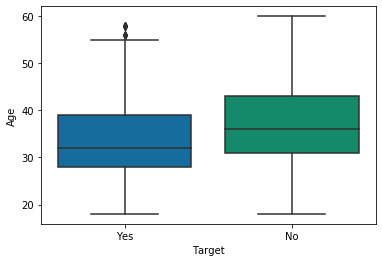

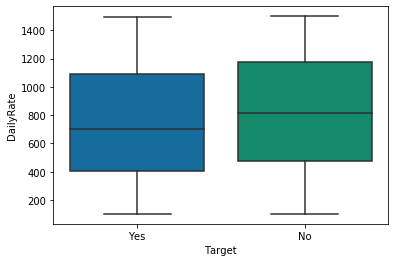

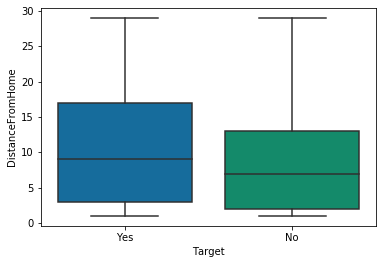

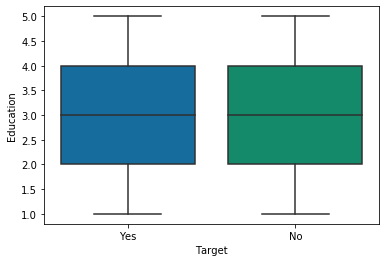

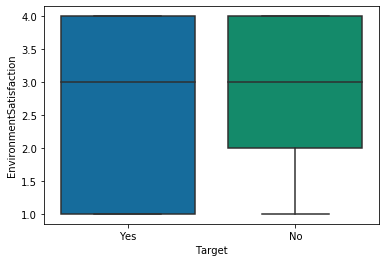

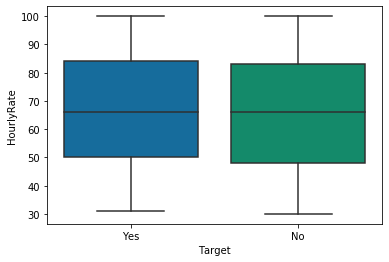

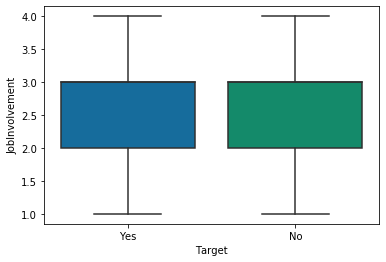

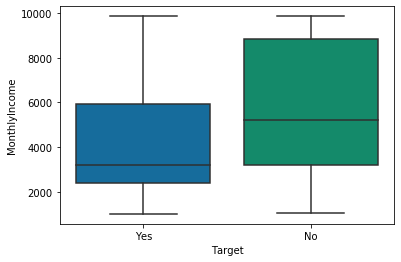

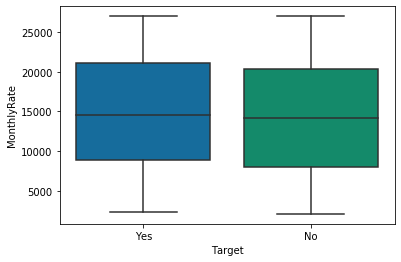

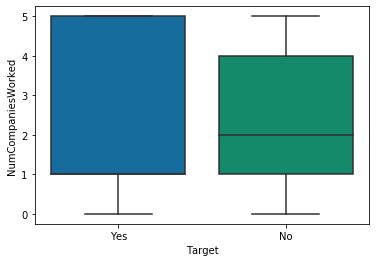

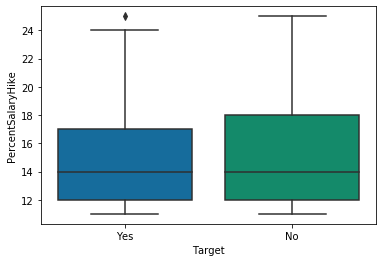

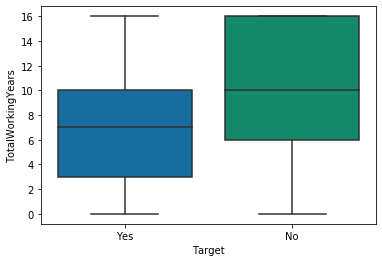

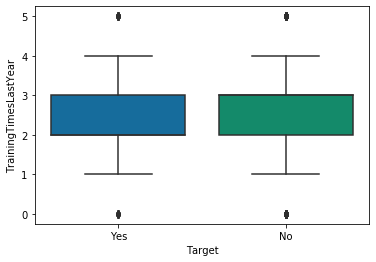

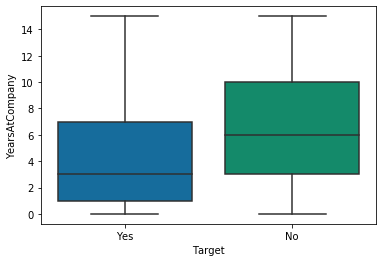

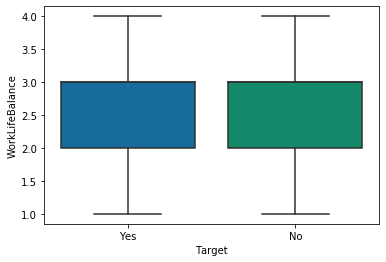

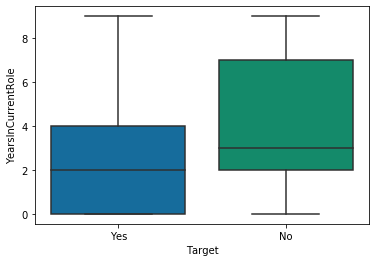

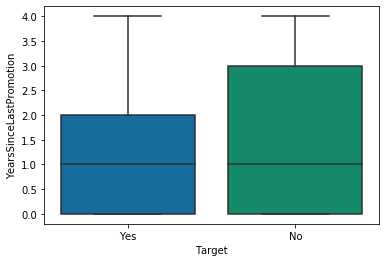

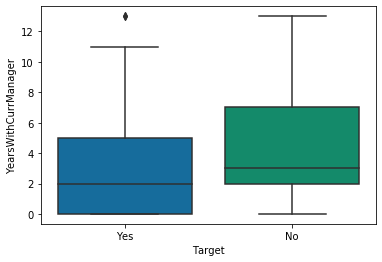

In [91]:
for i in num1:
    sns.boxplot(y = df1[i],x = df1['Target'])
    plt.show()

In [92]:
#df_HR.drop(['EmployeeCount','StandardHours'],axis=1,inplace = True)

**Correlation**

correlation coefficients only measure linear correlations.

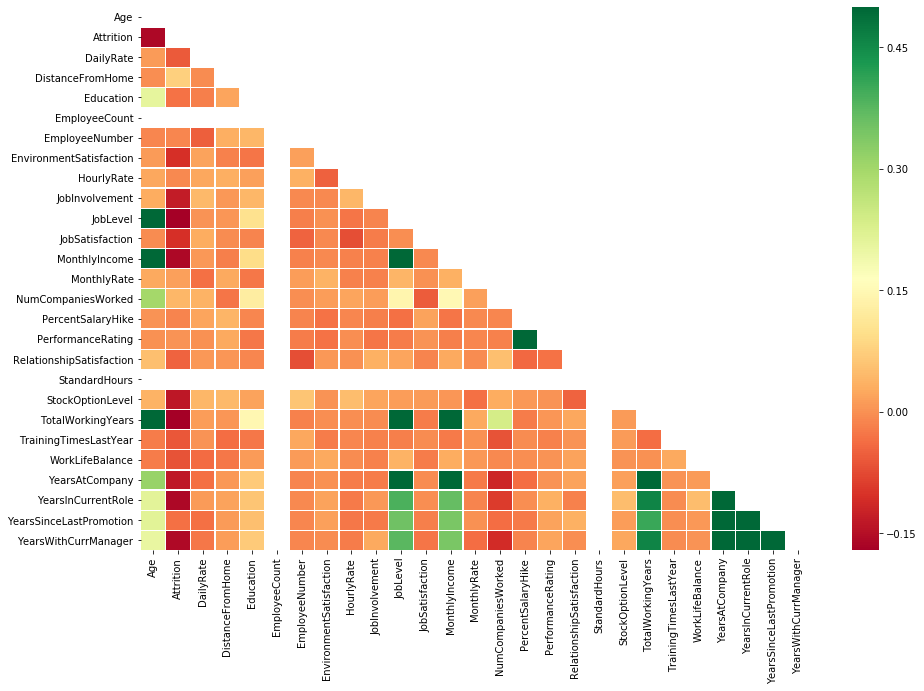

In [93]:
# Calculate correlations
corr = df_HR.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(corr,
            vmax=.5,
            mask=mask,
            # annot=True, fmt='.2f',
            linewidths=.2, cmap="RdYlGn")

"Monthly Rate", "Number of Companies Worked" and "Distance From Home" are positively correlated to Attrition;
while "Total Working Years", "Job Level", and "Years In Current Role" are negatively correlated to Attrition.

**Data Pre-processing**

In [94]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
# Create a label encoder object
le = LabelEncoder()

Perform Label Encoding


In [95]:
print(df_HR.shape)
df_HR.head()

(1470, 36)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Target
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5,Yes
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7,No
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0,Yes
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0,No
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2,No


In [96]:
# Label Encoding will be used for columns with 2 or less unique values
le_count = 0
for col in df_HR.columns[1:]:
    if df_HR[col].dtype == 'object':
        if len(list(df_HR[col].unique())) <= 2:
            le.fit(df_HR[col])
            df_HR[col] = le.transform(df_HR[col])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

4 columns were label encoded.


In [97]:
# convert rest of categorical variable into dummy
df_HR = pd.get_dummies(df_HR, drop_first=True)

In [98]:
df_HR.drop('Target',axis=1,inplace = True)

In [99]:
print(df_HR.shape)
df_HR.head()

(1470, 49)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,1,1,2,0,94,3,2,4,5993,19479,8,0,1,11,3,1,80,0,8,0,1,6,4,0,5,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,1,2,3,1,61,2,2,2,5130,24907,1,0,0,23,4,4,80,1,10,3,3,10,7,1,7,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,1,4,4,1,92,2,1,3,2090,2396,6,0,1,15,3,2,80,0,7,3,3,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,1,5,4,0,56,3,1,3,2909,23159,1,0,1,11,3,3,80,0,8,3,3,8,7,3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,7,1,1,40,3,1,2,3468,16632,9,0,0,12,3,4,80,1,6,3,3,2,2,2,2,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0


In [100]:
df_HR.shape

(1470, 49)

Feature Scaling

In [101]:
# import MinMaxScaler
##Scaling is done in order to achieve more accuracy and making all values to lie in the same range.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 5))
HR_col = list(df_HR.columns)
HR_col.remove('Attrition')
for col in HR_col:
    df_HR[col] = df_HR[col].astype(float)
    df_HR[[col]] = scaler.fit_transform(df_HR[[col]])
df_HR['Attrition'] = pd.to_numeric(df_HR['Attrition'], downcast='float')
df_HR.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,1.0,3.579098,0.000000,1.25,0.0,0.000000,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,0.0,5.0,0.000000,0.0,0.000000,0.0,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.0,0.633500,1.250000,0.00,0.0,0.002419,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,0.0,4.285714,5.0,5.000000,0.0,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,1.0,4.549034,0.178571,1.25,0.0,0.007257,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,0.0,5.0,1.428571,0.0,1.666667,0.0,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,0.0,4.617037,0.357143,3.75,0.0,0.009676,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,0.0,5.0,0.000000,0.0,3.333333,0.0,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,0.0,1.750179,0.178571,0.00,0.0,0.014514,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.0,0.357143,0.0,5.000000,0.0,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [102]:
df_HR.drop(['EmployeeNumber','Over18','StandardHours'],axis=1,inplace = True)

In [103]:
print('Size of Full Encoded Dataset: {}'. format(df_HR.shape))

Size of Full Encoded Dataset: (1470, 46)


Splitting data into training and testing sets

In [104]:
# assign the target to a new dataframe and convert it to a numerical feature
#df_target = df_HR[['Attrition']].copy()
target = df_HR['Attrition'].copy()

In [105]:
df_HR.shape

(1470, 46)

In [106]:
y = target
#df_HR.drop('Attrition',axis=1,inplace = True)
X = df_HR.iloc[:,2:]

In [107]:
X.head()
X = pd.concat([df_HR.Age,X],axis=1)
X.head()
#X.drop(['EmployeeCount','StandardHours'],axis=1,inplace = True)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,3.579098,0.000000,1.25,0.0,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,5.0,0.000000,0.0,0.000000,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.633500,1.250000,0.00,0.0,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,4.285714,5.0,5.000000,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,4.549034,0.178571,1.25,0.0,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,5.0,1.428571,0.0,1.666667,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,4.617037,0.357143,3.75,0.0,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,5.0,0.000000,0.0,3.333333,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,1.750179,0.178571,0.00,0.0,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.357143,0.0,5.000000,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [108]:
X.drop('Age',axis=1,inplace = True)

In [109]:
X = pd.concat([df_HR.Age,X],axis=1)

In [110]:
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,2.738095,3.579098,0.000000,1.25,0.0,1.666667,0.0,4.571429,3.333333,1.25,5.000000,1.312270,3.490263,4.444444,5.0,0.000000,0.0,0.000000,0.000000,1.000,0.0,0.000000,0.75,1.111111,0.000000,1.470588,0.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0
1,3.690476,0.633500,1.250000,0.00,0.0,3.333333,5.0,2.214286,1.666667,1.25,1.666667,1.085045,4.580004,0.555556,0.0,4.285714,5.0,5.000000,1.666667,1.250,2.5,3.333333,1.25,1.944444,0.333333,2.058824,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,2.261905,4.549034,0.178571,1.25,0.0,5.000000,5.0,4.428571,1.666667,0.00,3.333333,0.284623,0.060630,3.333333,5.0,1.428571,0.0,1.666667,0.000000,0.875,2.5,3.333333,0.00,0.000000,0.000000,0.000000,0.0,5.0,5.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,1.785714,4.617037,0.357143,3.75,0.0,5.000000,0.0,1.857143,3.333333,0.00,3.333333,0.500263,4.229070,0.555556,5.0,0.000000,0.0,3.333333,0.000000,1.000,2.5,3.333333,1.00,1.944444,1.000000,0.000000,5.0,0.0,5.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
4,1.071429,1.750179,0.178571,0.00,0.0,0.000000,5.0,0.714286,3.333333,0.00,1.666667,0.647446,2.918691,5.000000,0.0,0.357143,0.0,5.000000,1.666667,0.750,2.5,3.333333,0.25,0.555556,0.666667,0.588235,0.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0


In [111]:
y.head()


0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Attrition, dtype: float32

In [112]:
# Since we have class imbalance (i.e. more employees with turnover=0 than turnover=1)
# let's use stratify=y to maintain the same ratio as in the training dataset when splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=0,
                                                    stratify=target)  
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1176, 45)
Number transactions y_train dataset:  (1176,)
Number transactions X_test dataset:  (294, 45)
Number transactions y_test dataset:  (294,)


In [113]:
X_train.shape

(1176, 45)

**Model 1: Random Forest Classifier**: 
Random Forest is a popular and versatile machine learning method that is capable of solving both regression and classification. Random Forest is a brand of Ensemble learning, as it relies on an ensemble of decision trees. It aggregates Classification (or Regression) Trees. A decision tree is composed of a series of decisions that can be used to classify an observation in a dataset.

Random Forest fits a number of decision tree classifiers on various sub-samples of the dataset and use averaging to improve the predictive accuracy and control over-fitting. Random Forest can handle a large number of features, and is helpful for estimating which of your variables are important in the underlying data being modeled.

In [114]:
##Model 1: Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [115]:
##classifier object created and proper paraneters passed to model as per requirements to achieve more accuracy.

clf = RandomForestClassifier(min_samples_leaf = 3)
clf.fit(X_train,y_train)
##Feature importances to find the importance of features which affect the target variable
clf.feature_importances_

array([0.06149948, 0.04943301, 0.04574161, 0.0169265 , 0.        ,
       0.02927647, 0.01008344, 0.03882914, 0.01497386, 0.02052604,
       0.03095427, 0.07638405, 0.04660863, 0.03405567, 0.0784799 ,
       0.02977649, 0.00194826, 0.02144455, 0.04016543, 0.0503113 ,
       0.02007289, 0.01745452, 0.0449278 , 0.02795097, 0.02190119,
       0.02878502, 0.0201429 , 0.00573925, 0.00938258, 0.01005152,
       0.00879473, 0.0078574 , 0.00692683, 0.00048264, 0.00415998,
       0.00269656, 0.00647988, 0.00090911, 0.00094071, 0.0007013 ,
       0.0059685 , 0.00823274, 0.0132252 , 0.00946202, 0.01933566])

In [116]:
#9:85.37 #11:85.38 29:85.38 27: 85.72

clf.score(X_test,y_test)*100

85.71428571428571

In [117]:
#Cross Validation being done in order to check the minimum and maximum accuracy. along with the average performance
from sklearn.model_selection import cross_val_score
score_rf = cross_val_score(clf,X,y)
print('minimum score',min(score_rf))
print('avergage',np.mean(score_rf))
print('maximum',np.max(score_rf))

minimum score 0.8503401360544217
avergage 0.85578231292517
maximum 0.8639455782312925


In [118]:
###Reports for train data
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train,clf.predict(X_train)))
print(confusion_matrix(y_train,clf.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96       986
         1.0       1.00      0.57      0.73       190

    accuracy                           0.93      1176
   macro avg       0.96      0.79      0.84      1176
weighted avg       0.94      0.93      0.92      1176

[[986   0]
 [ 81 109]]


In [119]:
##Reports for test data
print(classification_report(y_test,clf.predict(X_test)))
print(confusion_matrix(y_test,clf.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       247
         1.0       1.00      0.11      0.19        47

    accuracy                           0.86       294
   macro avg       0.93      0.55      0.56       294
weighted avg       0.88      0.86      0.81       294

[[247   0]
 [ 42   5]]


**Model 2: Support Vector Classifier**: 
A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

In [120]:
##Model 2:Support Vector Classifier
from sklearn.svm import SVC
clf2 = SVC(C = 2,gamma = 0.01)
clf2.fit(X_train,y_train)
clf2.score(X_test,y_test)

0.8435374149659864

In [121]:
##technique being applied to find the proper parameters for maximum accuracy
from sklearn.model_selection import GridSearchCV
params_svc = {'C':list(np.arange(1,10)),'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.01,0.02,0.04]}

clfcv = GridSearchCV(clf2,params_svc)
clfcv.fit(X,y)
print(clfcv.best_params_)

{'C': 2, 'gamma': 0.01}


In [122]:
#Cross Validation for cehcking minimum and maximum accuracy
from sklearn.model_selection import cross_val_score
score_rf1 = cross_val_score(clf2,X,y)
print('minimum score',min(score_rf1))
print('avergage',np.mean(score_rf1))
print('maximum',np.max(score_rf1))

minimum score 0.8503401360544217
avergage 0.865986394557823
maximum 0.8809523809523809


In [123]:
##Training reports for classification
print(classification_report(y_train,clf2.predict(X_train)))
print(confusion_matrix(y_train,clf2.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       986
         1.0       0.99      0.83      0.91       190

    accuracy                           0.97      1176
   macro avg       0.98      0.92      0.94      1176
weighted avg       0.97      0.97      0.97      1176

[[985   1]
 [ 32 158]]


In [124]:
##Reports for testing data
print(classification_report(y_test,clf2.predict(X_test)))
print(confusion_matrix(y_test,clf2.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.97      0.91       247
         1.0       0.53      0.17      0.26        47

    accuracy                           0.84       294
   macro avg       0.70      0.57      0.59       294
weighted avg       0.81      0.84      0.81       294

[[240   7]
 [ 39   8]]


**Model 3: Logistic Regression**: 
Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical dependent variable. Logistic Regression is classification algorithm that is not as sophisticated as the ensemble methods or boosted decision trees method discussed below. Hence, it provides us with a good benchmark.

In [125]:
from sklearn.linear_model import LogisticRegression
clf3 = LogisticRegression()
clf3.fit(X_train,y_train)
pred3 = clf3.predict(X_test)

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [126]:
##Probability of correctness of result of test data
x = clf3.predict_proba(X_test)

In [127]:
##Cross Validation
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf3,X,y,cv=10)
print(min(scores))
print(np.mean(scores))
print(max(scores))

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

C:\Use

0.8503401360544217
0.883673469387755
0.9251700680272109


C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [128]:
##Training report 
print(classification_report(y_train,clf3.predict(X_train)))
print(confusion_matrix(y_train,clf3.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       986
         1.0       0.78      0.48      0.59       190

    accuracy                           0.89      1176
   macro avg       0.84      0.73      0.77      1176
weighted avg       0.89      0.89      0.88      1176

[[960  26]
 [ 99  91]]


In [129]:
##Testing report
print(classification_report(y_test,clf3.predict(X_test)))
print(confusion_matrix(y_test,clf3.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93       247
         1.0       0.75      0.32      0.45        47

    accuracy                           0.87       294
   macro avg       0.82      0.65      0.69       294
weighted avg       0.86      0.87      0.85       294

[[242   5]
 [ 32  15]]


**Model 4: KNeighbors Classifier**: 
The intuition behind the KNN algorithm is one of the simplest of all the supervised machine learning algorithms. It calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

In [130]:
##KNeighbors Classifier object with proper parameters to avpid overfitting and maximum accuracy
from sklearn.neighbors import KNeighborsClassifier
clf4 = KNeighborsClassifier(n_neighbors = 2)
clf4.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=2)

In [131]:
#Cross Validation
from sklearn.model_selection import cross_val_score
scores_clf4 = cross_val_score(clf4,X,y,cv=10)
print(min(scores_clf4))
print(np.mean(scores_clf4))
print(max(scores_clf4))

0.8231292517006803
0.838095238095238
0.8571428571428571


In [132]:
#Training Report 
print(classification_report(y_train,clf4.predict(X_train)))
print(confusion_matrix(y_train,clf4.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.88      1.00      0.93       986
         1.0       1.00      0.27      0.42       190

    accuracy                           0.88      1176
   macro avg       0.94      0.63      0.68      1176
weighted avg       0.90      0.88      0.85      1176

[[986   0]
 [139  51]]


In [133]:
#Testing report 
print(classification_report(y_test,clf4.predict(X_test)))
print(confusion_matrix(y_test,clf4.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.84      0.99      0.91       247
         1.0       0.25      0.02      0.04        47

    accuracy                           0.83       294
   macro avg       0.55      0.50      0.47       294
weighted avg       0.75      0.83      0.77       294

[[244   3]
 [ 46   1]]


**Model 5: XGB Classifier:** 
The implementation of the algorithm was engineered for efficiency of compute time and memory resources. A design goal was to make the best use of available resources to train the model. XGBoost is an implementation of gradient boosted decision trees designed for speed and performance.

In [134]:
##Model 5: XGB Classifier with parameters
from xgboost import XGBClassifier
clf5 = XGBClassifier(max_depth = 9)
clf5.fit(X_train,y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [135]:
#Cross Validation
scores_xg  = cross_val_score(clf5,X,y,cv=10)
print(min(scores_xg))
print(np.mean(scores_xg))
print(max(scores_xg))

0.8367346938775511
0.8612244897959185
0.9047619047619048


In [136]:
#Training Report 
print(classification_report(y_train,clf5.predict(X_train)))



              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       986
         1.0       1.00      1.00      1.00       190

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176



In [137]:
#Testing report 
print(clf5.score(X_test,y_test))
print(classification_report(y_test,clf5.predict(X_test)))
print(confusion_matrix(y_test,clf5.predict(X_test)))

0.8571428571428571
              precision    recall  f1-score   support

         0.0       0.86      0.98      0.92       247
         1.0       0.69      0.19      0.30        47

    accuracy                           0.86       294
   macro avg       0.78      0.59      0.61       294
weighted avg       0.84      0.86      0.82       294

[[243   4]
 [ 38   9]]


**Model 6: Naive Bayes:** Naive Bayes classifiers are a collection of classification algorithms based on Bayes’ Theorem. It is not a single algorithm but a family of algorithms where all of them share a common principle, i.e. every pair of features being classified is independent of each other.

In [138]:
##Model 6:Naive bayes
#Multinomial Naive bayes is considered since it fits the best and gives maximum accuracy
from sklearn.naive_bayes import MultinomialNB
clf6 = MultinomialNB(alpha = 7)
clf6.fit(X_train,y_train)


MultinomialNB(alpha=7)

In [139]:
#Parameters optimization using GridSearchCV
params_nb = {'alpha':list(np.arange(1,10))}

clf_nb = GridSearchCV(clf6,params_nb)
clf_nb.fit(X_train,y_train)
print(clf_nb.best_params_)
print(clf_nb.best_score_)

{'alpha': 9}
0.7823296069239091


In [140]:
#Training Report 
print(classification_report(y_train,clf6.predict(X_train)))
print(confusion_matrix(y_train,clf6.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.92      0.83      0.87       986
         1.0       0.41      0.64      0.50       190

    accuracy                           0.80      1176
   macro avg       0.67      0.73      0.69      1176
weighted avg       0.84      0.80      0.81      1176

[[814 172]
 [ 69 121]]


In [141]:
#Testing Report and Confusion matrix
print(classification_report(y_test,clf6.predict(X_test)))
print(confusion_matrix(y_test,clf6.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.90      0.81      0.85       247
         1.0       0.35      0.53      0.42        47

    accuracy                           0.77       294
   macro avg       0.62      0.67      0.64       294
weighted avg       0.81      0.77      0.78       294

[[200  47]
 [ 22  25]]


Checking accuracy using selective features using feature selection Techniques

[0.03974973 0.02912946 0.0341763  0.0261993  0.         0.03373511
 0.0201618  0.02836184 0.03193385 0.02978618 0.03137013 0.0360855
 0.02857168 0.03001875 0.06541265 0.02753912 0.01242156 0.03094232
 0.02815499 0.03520414 0.02528847 0.03232233 0.03246011 0.0289833
 0.02702439 0.02930516 0.02020313 0.01320298 0.01018304 0.01042753
 0.01497614 0.01004627 0.01496803 0.00668433 0.01351773 0.00602478
 0.01655541 0.00357441 0.0057706  0.00235416 0.01042264 0.00979618
 0.01437988 0.01518052 0.02739408]


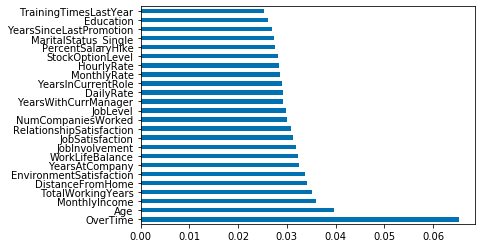

<Figure size 720x720 with 0 Axes>

OverTime                            0.065413
Age                                 0.039750
MonthlyIncome                       0.036085
TotalWorkingYears                   0.035204
DistanceFromHome                    0.034176
EnvironmentSatisfaction             0.033735
YearsAtCompany                      0.032460
WorkLifeBalance                     0.032322
JobInvolvement                      0.031934
JobSatisfaction                     0.031370
RelationshipSatisfaction            0.030942
NumCompaniesWorked                  0.030019
JobLevel                            0.029786
YearsWithCurrManager                0.029305
DailyRate                           0.029129
YearsInCurrentRole                  0.028983
MonthlyRate                         0.028572
HourlyRate                          0.028362
StockOptionLevel                    0.028155
PercentSalaryHike                   0.027539
MaritalStatus_Single                0.027394
YearsSinceLastPromotion             0.027024
Education 

In [142]:
##finding features that are important using feature importances

from sklearn.ensemble import ExtraTreesClassifier
#import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(24).plot(kind='barh')
plt.figure(figsize = (10,10))
plt.show()
s = feat_importances.nlargest(27)
print(s)

In [143]:
##Important features based on feature importance
features_24 = X[['OverTime','Age','MonthlyIncome','YearsAtCompany','EnvironmentSatisfaction','TotalWorkingYears','DistanceFromHome','JobSatisfaction','JobInvolvement','WorkLifeBalance','YearsWithCurrManager','YearsInCurrentRole','NumCompaniesWorked','RelationshipSatisfaction','DailyRate','JobLevel','HourlyRate','YearsSinceLastPromotion','TrainingTimesLastYear','MaritalStatus_Single','Education','BusinessTravel_Travel_Frequently','BusinessTravel_Travel_Rarely','Gender']]

In [144]:
features_24 = pd.concat([features_24,X.StockOptionLevel],axis=1)

In [145]:
features_24 = pd.concat([features_24,X.MonthlyRate],axis=1)

In [146]:
features_24 = pd.concat([features_24,X.PercentSalaryHike],axis=1)

In [147]:
features_24.head()

,OverTime,Age,MonthlyIncome,YearsAtCompany,EnvironmentSatisfaction,TotalWorkingYears,DistanceFromHome,JobSatisfaction,JobInvolvement,WorkLifeBalance,YearsWithCurrManager,YearsInCurrentRole,NumCompaniesWorked,RelationshipSatisfaction,DailyRate,JobLevel,HourlyRate,YearsSinceLastPromotion,TrainingTimesLastYear,MaritalStatus_Single,Education,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Gender,StockOptionLevel,MonthlyRate,PercentSalaryHike
0,5.0,2.738095,1.312270,0.75,1.666667,1.000,0.000000,5.000000,3.333333,0.000000,1.470588,1.111111,4.444444,0.000000,3.579098,1.25,4.571429,0.000000,0.0,5.0,1.25,0.0,5.0,0.0,0.000000,3.490263,0.000000
1,0.0,3.690476,1.085045,1.25,3.333333,1.250,1.250000,1.666667,1.666667,3.333333,2.058824,1.944444,0.555556,5.000000,0.633500,1.25,2.214286,0.333333,2.5,0.0,0.00,5.0,0.0,5.0,1.666667,4.580004,4.285714
2,5.0,2.261905,0.284623,0.00,5.000000,0.875,0.178571,3.333333,1.666667,3.333333,0.000000,0.000000,3.333333,1.666667,4.549034,0.00,4.428571,0.000000,2.5,5.0,1.25,0.0,5.0,5.0,0.000000,0.060630,1.428571
3,5.0,1.785714,0.500263,1.00,5.000000,1.000,0.357143,3.333333,3.333333,3.333333,0.000000,1.944444,0.555556,3.333333,4.617037,0.00,1.857143,1.000000,2.5,0.0,3.75,5.0,0.0,0.0,0.000000,4.229070,0.000000
4,0.0,1.071429,0.647446,0.25,0.000000,0.750,0.178571,1.666667,3.333333,3.333333,0.588235,0.555556,5.000000,5.000000,1.750179,0.00,0.714286,0.666667,2.5,0.0,0.00,0.0,5.0,5.0,1.666667,2.918691,0.357143


In [148]:
##Splitting of data into train and test for training anf testing purposes
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,y_test = train_test_split(features_24,y,test_size = 0.2,random_state = 0)

In [149]:
##Model 1:considering the Logistic Regression model for classification based on important features
from sklearn.linear_model import LogisticRegression
clf_24 = LogisticRegression(n_jobs = 10,max_iter = 10000)
clf_24.fit(x_train,y_train)
print(clf_24.score(X_test,y_test))

0.8707482993197279


In [150]:
#Reports for testing data with confusion matrix for checking the classification efficiency on trained model
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,clf_24.predict(X_test)))
print(classification_report(y_test,clf_24.predict(X_test)))

[[238   7]
 [ 31  18]]
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.93       245
         1.0       0.72      0.37      0.49        49

    accuracy                           0.87       294
   macro avg       0.80      0.67      0.71       294
weighted avg       0.86      0.87      0.85       294



In [151]:
#Reports for training data with confusion matrix for checking the classification efficiency
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,clf_24.predict(x_train)))
print(classification_report(y_train,clf_24.predict(x_train)))

[[964  24]
 [115  73]]
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93       988
         1.0       0.75      0.39      0.51       188

    accuracy                           0.88      1176
   macro avg       0.82      0.68      0.72      1176
weighted avg       0.87      0.88      0.87      1176



In [152]:
#Cross Validation for checking the possible maximum and minimum accuarcy of the model
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_24,features_24,y)
print(np.min(scores),np.mean(scores),max(scores))

0.8537414965986394 0.8687074829931973 0.8877551020408163


In [153]:
##Model 2: RandomForestClassifier with selective features
from sklearn.ensemble import RandomForestClassifier
clf_241 = RandomForestClassifier(min_samples_leaf =  3, min_samples_split = 4,n_estimators = 1000,max_depth = 20)
clf_241.fit(x_train,y_train)
print(clf_241.score(X_test,y_test))

0.8503401360544217


In [154]:
params_2411 = {'min_samples_leaf':list(np.arange(2,10)),'min_samples_split':list(np.arange(2,10))}
clf_2411 = GridSearchCV(clf_241,params_2411)
clf_2411.fit(features_24,y)
print(clf_2411.best_score_)
print(clf_2411.best_params_)

0.8612244897959183
{'min_samples_leaf': 3, 'min_samples_split': 7}


In [155]:
##reports for training data
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,clf_241.predict(x_train)))
print(classification_report(y_train,clf_241.predict(x_train)))

[[988   0]
 [ 77 111]]
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96       988
         1.0       1.00      0.59      0.74       188

    accuracy                           0.93      1176
   macro avg       0.96      0.80      0.85      1176
weighted avg       0.94      0.93      0.93      1176



In [156]:
#reports for testing data
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,clf_241.predict(X_test)))
print(classification_report(y_test,clf_241.predict(X_test)))

[[242   3]
 [ 41   8]]
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       245
         1.0       0.73      0.16      0.27        49

    accuracy                           0.85       294
   macro avg       0.79      0.58      0.59       294
weighted avg       0.83      0.85      0.81       294



In [157]:
###Model 3:Kneighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
clf_242 = KNeighborsClassifier(n_neighbors = 9)
clf_242.fit(x_train,y_train)
print(clf_242.score(X_test,y_test))

0.8571428571428571


In [158]:
params_kn = {'n_neighbors':list(np.arange(2,10))}
clf_24_kn = GridSearchCV(clf_242,params_kn)
clf_24_kn.fit(features_24,y)
print(clf_24_kn.best_params_)
print(clf_24_kn.best_score_)

{'n_neighbors': 9}
0.8503401360544217


In [159]:
#Reports for training data
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_train,clf_242.predict(x_train)))
print(classification_report(y_train,clf_242.predict(x_train)))

[[975  13]
 [153  35]]
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       988
         1.0       0.73      0.19      0.30       188

    accuracy                           0.86      1176
   macro avg       0.80      0.59      0.61      1176
weighted avg       0.84      0.86      0.82      1176



In [160]:
#Reports for testing data
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,clf_242.predict(X_test)))
print(classification_report(y_test,clf_242.predict(X_test)))

[[243   2]
 [ 40   9]]
              precision    recall  f1-score   support

         0.0       0.86      0.99      0.92       245
         1.0       0.82      0.18      0.30        49

    accuracy                           0.86       294
   macro avg       0.84      0.59      0.61       294
weighted avg       0.85      0.86      0.82       294



In [161]:
#Cross Validation for checking the possible maximum and minimum accuarcy of the model
from sklearn.model_selection import cross_val_score
scores_kn_24 = cross_val_score(clf_242,features_24,y)
print(np.min(scores_kn_24),np.mean(scores_kn_24),max(scores_kn_24))

0.8401360544217688 0.8503401360544217 0.8673469387755102


In [162]:
##Model 4: Support Vector Classifier
clf_243 = SVC(C = 2,gamma = 0.1)
clf_243.fit(x_train,y_train)
clf_243.score(X_test,y_test)

0.8333333333333334

In [163]:
#Reports for training data
print(classification_report(y_train,clf_243.predict(x_train)))
print(confusion_matrix(y_train,clf_243.predict(x_train)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       988
         1.0       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

[[988   0]
 [  0 188]]


In [164]:
#Reports for testing data
print(classification_report(y_test,clf_243.predict(X_test)))
print(confusion_matrix(y_test,clf_243.predict(X_test)))

C:\Users\ADMIN\AppData\Roaming\Python\Python37\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91       245
         1.0       0.00      0.00      0.00        49

    accuracy                           0.83       294
   macro avg       0.42      0.50      0.45       294
weighted avg       0.69      0.83      0.76       294

[[245   0]
 [ 49   0]]


In [165]:
##Terms in two series in common?? cehck this once
from xgboost import XGBClassifier

clf_244 = XGBClassifier(max_depth = 7,learning_rate = 0.02)
clf_244.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.02, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [166]:
##Parameter Optimization using GridSearchCV
params_xg = {'max_depth':list(np.arange(2,10))}
clf_opt = GridSearchCV(clf_244,params_xg)
clf_opt.fit(features_24,y)
print(clf_opt.best_params_)
print(clf_opt.best_score_)

{'max_depth': 4}
0.8605442176870749


In [167]:
#Cross Validation on the dataset for minimum and maximum accuracies
scores_24_xg = cross_val_score(clf_244,features_24,y)
print(min(scores_24_xg))
print(np.mean(scores_24_xg))
print(max(scores_24_xg))

0.8333333333333334
0.8530612244897959
0.8707482993197279


In [168]:
#reports for training data
print(classification_report(y_train,clf_244.predict(x_train)))
print(confusion_matrix(y_train,clf_244.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98       988
         1.0       1.00      0.78      0.87       188

    accuracy                           0.96      1176
   macro avg       0.98      0.89      0.93      1176
weighted avg       0.97      0.96      0.96      1176

[[988   0]
 [ 42 146]]


In [169]:
#reports for testing data
print(classification_report(y_test,clf_244.predict(X_test)))
print(confusion_matrix(y_test,clf_244.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91       245
         1.0       0.55      0.24      0.34        49

    accuracy                           0.84       294
   macro avg       0.70      0.60      0.62       294
weighted avg       0.81      0.84      0.81       294

[[235  10]
 [ 37  12]]


In [170]:
from sklearn.naive_bayes import MultinomialNB
clf_245 = MultinomialNB(alpha = 9)
clf_245.fit(x_train,y_train)


MultinomialNB(alpha=9)

In [171]:
params_2455 = {'alpha':list(np.arange(1,10))}
clf_2455 = GridSearchCV(clf_245,params_2455)
clf_2455.fit(features_24,y)
print(clf_2455.best_params_)
print(clf_2455.best_score_)


{'alpha': 9}
0.8156462585034013


In [172]:
#reports for training data
print(classification_report(y_train,clf_245.predict(x_train)))
print(confusion_matrix(y_train,clf_245.predict(x_train)))

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.89       988
         1.0       0.44      0.60      0.51       188

    accuracy                           0.81      1176
   macro avg       0.68      0.73      0.70      1176
weighted avg       0.84      0.81      0.82      1176

[[844 144]
 [ 75 113]]


In [173]:
#reports for testing data
print(classification_report(y_test,clf_245.predict(X_test)))
print(confusion_matrix(y_test,clf_245.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88       245
         1.0       0.45      0.59      0.51        49

    accuracy                           0.81       294
   macro avg       0.68      0.72      0.70       294
weighted avg       0.83      0.81      0.82       294

[[209  36]
 [ 20  29]]


In [174]:
#Cross Validation on the dataset for minimum and maximum accuracies
scores_25_xg = cross_val_score(clf_245,features_24,y)
print(min(scores_25_xg))
print(np.mean(scores_25_xg))
print(max(scores_25_xg))

0.7959183673469388
0.8156462585034013
0.8367346938775511


In [175]:
##Max Depth = 10
clf_10 = XGBClassifier(max_depth = 10)
clf_10.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [176]:
print(classification_report(y_train,clf_10.predict(x_train)))
print(confusion_matrix(y_train,clf_10.predict(x_train)))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       988
         1.0       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

[[988   0]
 [  0 188]]


In [177]:
print(classification_report(y_test,clf_10.predict(X_test)))
print(confusion_matrix(y_test,clf_10.predict(X_test)))


              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       245
         1.0       0.54      0.29      0.37        49

    accuracy                           0.84       294
   macro avg       0.70      0.62      0.64       294
weighted avg       0.81      0.84      0.82       294

[[233  12]
 [ 35  14]]


In [178]:
#Cross Validation on the dataset for minimum and maximum accuracies
scores_2510_xg = cross_val_score(clf_10,features_24,y)
print(min(scores_2510_xg))
print(np.mean(scores_2510_xg))
print(max(scores_2510_xg))

0.8469387755102041
0.8666666666666668
0.8809523809523809


In [179]:
##Max Depth = 6
clf_6 = XGBClassifier(max_depth = 6)
clf_6.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
print(classification_report(y_train,clf_6.predict(x_train)))
print(confusion_matrix(y_train,clf_6.predict(x_train)))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       988
         1.0       1.00      1.00      1.00       188

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

[[988   0]
 [  0 188]]


In [181]:
print(classification_report(y_test,clf_6.predict(X_test)))
print(confusion_matrix(y_test,clf_6.predict(X_test)))


              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91       245
         1.0       0.52      0.27      0.35        49

    accuracy                           0.84       294
   macro avg       0.69      0.61      0.63       294
weighted avg       0.81      0.84      0.81       294

[[233  12]
 [ 36  13]]


In [182]:
#Cross Validation on the dataset for minimum and maximum accuracies
scores_25106_xg = cross_val_score(clf_6,features_24,y)
print(min(scores_25106_xg))
print(np.mean(scores_25106_xg))
print(max(scores_25106_xg))

0.8469387755102041
0.8605442176870748
0.8843537414965986
